In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
j17 = pd.read_csv(os.path.join("..", "data", "dateRange_j17.csv"))
j17['datetime'] = pd.to_datetime(j17['datetime'])
j17.head()

,datetime,MaxLevel
0,2010-01-01 00:00:00,670.1
1,2010-01-01 00:15:00,670.1
2,2010-01-01 00:30:00,670.1
3,2010-01-01 00:45:00,670.1
4,2010-01-01 01:00:00,670.1


In [3]:
X, y = np.array(j17['datetime'].tolist()), np.array(j17['MaxLevel'].tolist()) # make these list like arrays
d = np.array(j17['datetime'].apply(lambda x: x.toordinal()).tolist())
hour = np.array(j17['datetime'].apply(lambda x: x.hour).tolist())
month = np.array(j17['datetime'].apply(lambda x: x.month).tolist())


In [11]:
X1 = []
for i in range(len(X)):
    X1.append(np.array([d[i], hour[i], month[i]])) # eventually we can add more input data here
X1 = np.array(X1)
print("X1 Shape is ", X1.shape)

X1 Shape is  (308353, 3)


In [17]:
train_X, test_X, train_y, test_y = train_test_split(X1, y, test_size=0.5, random_state=123)
print("Labels for training and testing data")
print("Train Y shape: ", train_y.shape)
print("Test  Y shape: ", test_y.shape)

Labels for training and testing data
Train Y shape:  (154176,)
Test  Y shape:  (154177,)


In [7]:
k = 20 # ?? I dont know what is best to use yet
knn = KNeighborsRegressor(n_neighbors=k) # use regressor for this kind of data
knn.fit(train_X, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='uniform')

In [8]:
# TODO: look at correlation matrix, predict future by feeding array of the shape (day, hr, month)
# Like the following:
future_time = [[5,9,7]] # 5th of July at 9 am
future_time = np.array(future_time)

In [9]:
y_pred = knn.predict(future_time)
print(y_pred)

[670.1]


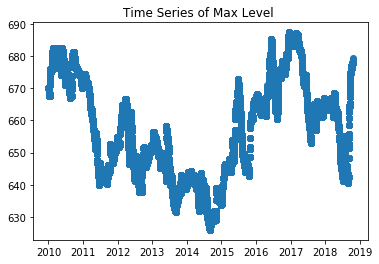

In [10]:
fig, ax = plt.subplots()
plt.plot_date(j17['datetime'], j17['MaxLevel'])
ax.set_title('Time Series of Max Level ')
plt.show()